In [1]:
import numpy as np   ## Numerical python module for mathematical
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df=pd.read_csv("train (1).csv")

In [3]:
df.head(10)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Chakcharan,Afghanistan,33.0,65.0,1/22/2020,0,0
1,2,Chakcharan,Afghanistan,33.0,65.0,1/23/2020,0,0
2,3,Chakcharan,Afghanistan,33.0,65.0,1/24/2020,0,0
3,4,Chakcharan,Afghanistan,33.0,65.0,1/25/2020,0,0
4,5,Chakcharan,Afghanistan,33.0,65.0,1/26/2020,0,0
5,6,Chakcharan,Afghanistan,33.0,65.0,1/27/2020,0,0
6,7,Chakcharan,Afghanistan,33.0,65.0,1/28/2020,0,0
7,8,Chakcharan,Afghanistan,33.0,65.0,1/29/2020,0,0
8,9,Chakcharan,Afghanistan,33.0,65.0,1/30/2020,0,0
9,10,Chakcharan,Afghanistan,33.0,65.0,1/31/2020,0,0


In [4]:
df["date"]=pd.DatetimeIndex(df["Date"]).day
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,date
0,1,Chakcharan,Afghanistan,33.0,65.0,1/22/2020,0,0,22
1,2,Chakcharan,Afghanistan,33.0,65.0,1/23/2020,0,0,23
2,3,Chakcharan,Afghanistan,33.0,65.0,1/24/2020,0,0,24
3,4,Chakcharan,Afghanistan,33.0,65.0,1/25/2020,0,0,25
4,5,Chakcharan,Afghanistan,33.0,65.0,1/26/2020,0,0,26


In [5]:
df["month"]=pd.DatetimeIndex(df["Date"]).month
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,date,month
0,1,Chakcharan,Afghanistan,33.0,65.0,1/22/2020,0,0,22,1
1,2,Chakcharan,Afghanistan,33.0,65.0,1/23/2020,0,0,23,1
2,3,Chakcharan,Afghanistan,33.0,65.0,1/24/2020,0,0,24,1
3,4,Chakcharan,Afghanistan,33.0,65.0,1/25/2020,0,0,25,1
4,5,Chakcharan,Afghanistan,33.0,65.0,1/26/2020,0,0,26,1


In [6]:
df["year"] = pd.DatetimeIndex(df["Date"]).year
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,date,month,year
0,1,Chakcharan,Afghanistan,33.0,65.0,1/22/2020,0,0,22,1,2020
1,2,Chakcharan,Afghanistan,33.0,65.0,1/23/2020,0,0,23,1,2020
2,3,Chakcharan,Afghanistan,33.0,65.0,1/24/2020,0,0,24,1,2020
3,4,Chakcharan,Afghanistan,33.0,65.0,1/25/2020,0,0,25,1,2020
4,5,Chakcharan,Afghanistan,33.0,65.0,1/26/2020,0,0,26,1,2020


# Exploratory Data Analysis

In [7]:
df=df.drop(["Date","year","Province/State","Id"],axis=1)

INFERENCE
- Dropped the Date,Year,Province/State and Id as there is no importance.

In [8]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'ConfirmedCases', 'Fatalities', 'date',
       'month'],
      dtype='object')

In [9]:
df.isnull().sum()

Country/Region    0
Lat               0
Long              0
ConfirmedCases    0
Fatalities        0
date              0
month             0
dtype: int64

In [10]:
df.dtypes

Country/Region     object
Lat               float64
Long              float64
ConfirmedCases      int64
Fatalities          int64
date                int64
month               int64
dtype: object

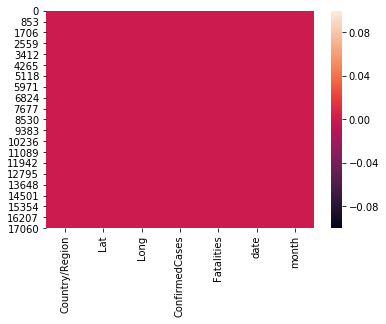

In [11]:
sns.heatmap(df.isnull())

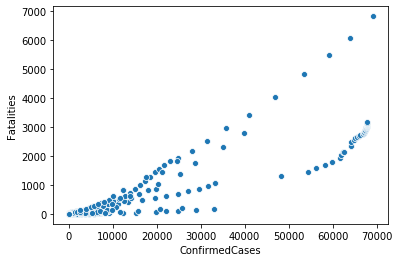

In [12]:
sns.scatterplot(x=df.ConfirmedCases,y=df.Fatalities)
plt.show()

In [13]:
current_sistuation=df.groupby("Country/Region")["ConfirmedCases","Fatalities"].max()
current_sistuation.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
Country/Region,,
Afghanistan,74,1
Albania,123,5
Algeria,264,19
Andorra,164,1
Antigua and Barbuda,3,0
Argentina,387,6
Armenia,249,0
Aruba,0,0
Australia,818,7


INFERENCE
- Italy has more confirmed cases at the present sistuation.
- Italy has more fatalities at the present sistuation.

In [14]:
current_sistuation.nlargest(10,"ConfirmedCases")

,ConfirmedCases,Fatalities
Country/Region,,
Italy,69176,6820
China,67801,3160
Spain,39885,2808
Germany,32986,157
US,25681,210
Iran,24811,1934
France,19874,860
Switzerland,9877,122
"Korea, South",9037,120


In [15]:
current_sistuation.nlargest(10,"Fatalities")

,ConfirmedCases,Fatalities
Country/Region,,
Italy,69176,6820
China,67801,3160
Spain,39885,2808
Iran,24811,1934
France,19874,860
United Kingdom,8077,422
Netherlands,5560,276
US,25681,210
Germany,32986,157


In [16]:
monthly_cases=df.groupby("month")["ConfirmedCases","Fatalities"].max()
monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,5806,204
2,66337,2727
3,69176,6820


INFERENCE
- when we compared to monthly cases the Confirmed cases and Fatalities of month 1 and month 2 has lot of difference.
- when we compared to month 2 and month 3 the confirmed cases are less compared with month 1 and month 2, but Fatalities has increased a lot.

In [17]:
India=df[df["Country/Region"]=="India"]

In [18]:
India

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,month
8001,India,21.0,78.0,0,0,22,1
8002,India,21.0,78.0,0,0,23,1
8003,India,21.0,78.0,0,0,24,1
8004,India,21.0,78.0,0,0,25,1
8005,India,21.0,78.0,0,0,26,1
...,...,...,...,...,...,...,...
8059,India,21.0,78.0,244,5,20,3
8060,India,21.0,78.0,330,4,21,3
8061,India,21.0,78.0,396,7,22,3
8062,India,21.0,78.0,499,10,23,3


In [19]:
India_monthly_cases=India.groupby("month")["ConfirmedCases","Fatalities"].max()
India_monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,1,0
2,3,0
3,536,10


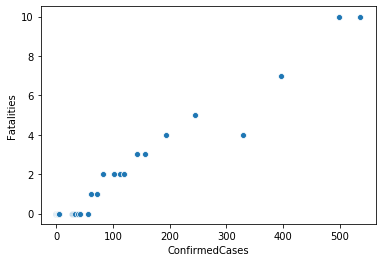

In [20]:
sns.scatterplot(x=India.ConfirmedCases,y=India.Fatalities)
plt.show()

INFERENCE
1. INDIA
 - The confirmed cases are gradually increases in month 3.

In [21]:
Italy=df[df["Country/Region"]=="Italy"]
Italy

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,month
8379,Italy,43.0,12.0,0,0,22,1
8380,Italy,43.0,12.0,0,0,23,1
8381,Italy,43.0,12.0,0,0,24,1
8382,Italy,43.0,12.0,0,0,25,1
8383,Italy,43.0,12.0,0,0,26,1
...,...,...,...,...,...,...,...
8437,Italy,43.0,12.0,47021,4032,20,3
8438,Italy,43.0,12.0,53578,4825,21,3
8439,Italy,43.0,12.0,59138,5476,22,3
8440,Italy,43.0,12.0,63927,6077,23,3


In [22]:
Italy_monthly_cases=Italy.groupby("month")["ConfirmedCases","Fatalities"].max()
Italy_monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,2,0
2,1128,29
3,69176,6820


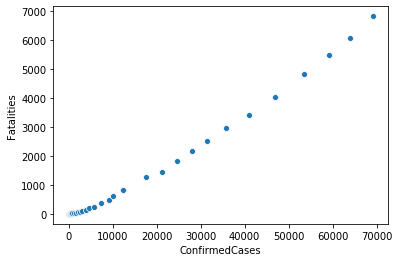

In [23]:
sns.scatterplot(x=Italy.ConfirmedCases,y=Italy.Fatalities)
plt.show()

INFERENCE
2. ITALY
 - The Confired cases and Fatalities are increased gradually in month 3.

In [24]:
China=df[df["Country/Region"]=="China"]
China

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,month
2961,China,31.8257,117.2264,1,0,22,1
2962,China,31.8257,117.2264,9,0,23,1
2963,China,31.8257,117.2264,15,0,24,1
2964,China,31.8257,117.2264,39,0,25,1
2965,China,31.8257,117.2264,60,0,26,1
...,...,...,...,...,...,...,...
5035,China,29.1832,120.0934,1234,1,20,3
5036,China,29.1832,120.0934,1236,1,21,3
5037,China,29.1832,120.0934,1237,1,22,3
5038,China,29.1832,120.0934,1238,1,23,3


In [25]:
China_monthly_cases=China.groupby("month")["ConfirmedCases","Fatalities"].max()
China_monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,5806,204
2,66337,2727
3,67801,3160


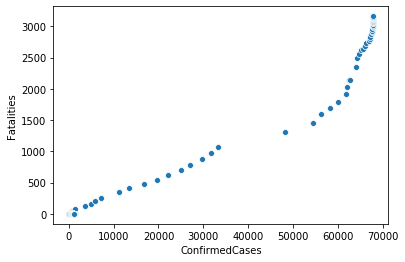

In [26]:
sns.scatterplot(x=China.ConfirmedCases,y=China.Fatalities)
plt.show()

INFERENCE
3. CHINA
 - In month 2 and month 3 the confirmed cases and fatalities are decreased when compare with month 1 and month 2.

In [27]:
Spain=df[df["Country/Region"]=="Spain"]
Spain

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,month
12537,Spain,40.0,-4.0,0,0,22,1
12538,Spain,40.0,-4.0,0,0,23,1
12539,Spain,40.0,-4.0,0,0,24,1
12540,Spain,40.0,-4.0,0,0,25,1
12541,Spain,40.0,-4.0,0,0,26,1
...,...,...,...,...,...,...,...
12595,Spain,40.0,-4.0,20410,1043,20,3
12596,Spain,40.0,-4.0,25374,1375,21,3
12597,Spain,40.0,-4.0,28768,1772,22,3
12598,Spain,40.0,-4.0,35136,2311,23,3


In [28]:
Spain_monthly_cases=Spain.groupby("month")["ConfirmedCases","Fatalities"].max()
Spain_monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,0,0
2,45,0
3,39885,2808


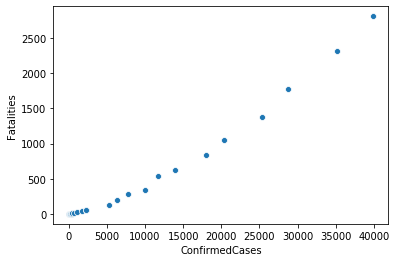

In [29]:
sns.scatterplot(x=Spain.ConfirmedCases,y=Spain.Fatalities)
plt.show()

INFERENCE
4. SPAIN
 - In month 3 the confirmed cases and fatalities are gradually increases.

In [30]:
US=df[df["Country/Region"]=="US"]
US

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,month
13482,US,32.3182,-86.9023,0,0,22,1
13483,US,32.3182,-86.9023,0,0,23,1
13484,US,32.3182,-86.9023,0,0,24,1
13485,US,32.3182,-86.9023,0,0,25,1
13486,US,32.3182,-86.9023,0,0,26,1
...,...,...,...,...,...,...,...
17131,US,42.7560,-107.3025,19,0,20,3
17132,US,42.7560,-107.3025,23,0,21,3
17133,US,42.7560,-107.3025,24,0,22,3
17134,US,42.7560,-107.3025,26,0,23,3


In [31]:
US_monthly_cases=US.groupby("month")["ConfirmedCases","Fatalities"].max()
US_monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,0,0
2,44,0
3,25681,210


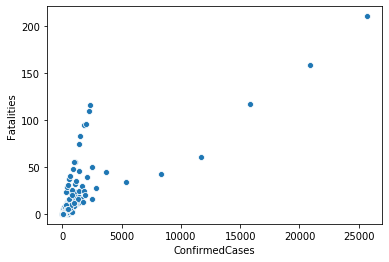

In [32]:
sns.scatterplot(x=US.ConfirmedCases,y=US.Fatalities)
plt.show()

INFERENCE
5. US
 - In month 3 the confirmed cases are gradually increases, but fatalities are less when compare to spain.

In [33]:
Germany=df[df["Country/Region"]=="Germany"]
Germany

,Country/Region,Lat,Long,ConfirmedCases,Fatalities,date,month
7119,Germany,51.0,9.0,0,0,22,1
7120,Germany,51.0,9.0,0,0,23,1
7121,Germany,51.0,9.0,0,0,24,1
7122,Germany,51.0,9.0,0,0,25,1
7123,Germany,51.0,9.0,0,0,26,1
...,...,...,...,...,...,...,...
7177,Germany,51.0,9.0,19848,67,20,3
7178,Germany,51.0,9.0,22213,84,21,3
7179,Germany,51.0,9.0,24873,94,22,3
7180,Germany,51.0,9.0,29056,123,23,3


In [34]:
Germany_monthly_cases=Germany.groupby("month")["ConfirmedCases","Fatalities"].max()
Germany_monthly_cases.style.background_gradient(cmap='Pastel1_r')

,ConfirmedCases,Fatalities
month,,
1,5,0
2,79,0
3,32986,157


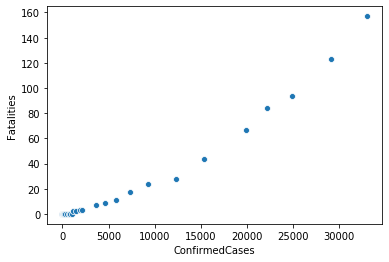

In [35]:
sns.scatterplot(x=Germany.ConfirmedCases,y=Germany.Fatalities)
plt.show()

INFERENCE
6. GERMANY
 - In month 3 the confirmed cases are more when compare with month 2 and month 1, but fatalities are less when compare with spain and US.

# Regression models

## OLS Regression

In [36]:
X=df.ConfirmedCases
y=df.Fatalities

In [37]:
from statsmodels.formula.api import ols

In [38]:
import statsmodels.api as sm

In [39]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

C:\Users\Kasturi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Fatalities   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.105e+05
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:24:18   Log-Likelihood:            -1.0010e+05
No. Observations:               17892   AIC:                         2.002e+05
Df Residuals:                   17890   BIC:                         2.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.8900      0.489     -5.915      0.000      -3.848      -1.932
ConfirmedCases     0.0457      0.000    332.421      0.000       0.045       0.046
==============================================================================
Omnibus:                    42445.879   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1230332359.984
Skew:                          23.573   Prob(JB):                         0.00
Kurtosis:                    1286.792   Cond. No.                     3.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

INFERENCE
- Fatalities = -2.89+0.0457*ConfirmedCases

## Linear Regression

In [40]:
X=df.ConfirmedCases.values.reshape(-1,1)
y=df.Fatalities.values.reshape(-1,1)

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=111)

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

1. The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

In [49]:
# To retrive the intercept
print("Intercept is:",regressor.intercept_)

# To retrive the coefficent
print("Coefficent is:",regressor.coef_)

Intercept is: [-2.95847909]
Coefficent is: [[0.04636668]]


INFERENCE
 - For every one unit of change in ConfirmedCases, the change in the Fatalities is about 4.6%.

2. Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

In [50]:
y_prediction=regressor.predict(X_test)
y_prediction

array([[-2.95847909],
       [-2.95847909],
       [54.58257643],
       ...,
       [-2.95847909],
       [-2.95847909],
       [ 3.81105685]])

In [51]:
# Now compare the actual output values for X_test with the predicted values

df1=pd.DataFrame({"Actual":y_test.flatten(),"Prediction":y_prediction.flatten()})
df1

,Actual,Prediction
0,0,-2.958479
1,0,-2.958479
2,2,54.582576
3,0,-2.633912
4,0,-2.958479
...,...,...
5363,0,-2.958479
5364,0,-2.958479
5365,0,-2.958479
5366,0,-2.958479


In [53]:
df1.head(25)

,Actual,Prediction
0,0,-2.958479
1,0,-2.958479
2,2,54.582576
3,0,-2.633912
4,0,-2.958479
5,3,3.301023
6,0,-2.958479
7,0,-2.958479
8,0,-2.958479
9,0,-2.402079


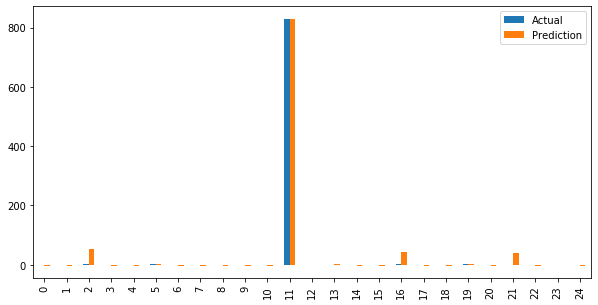

In [52]:
# For only 25 records because alot of rows

df11=df1.head(25)
df11.plot(kind="bar",figsize=(10,5))

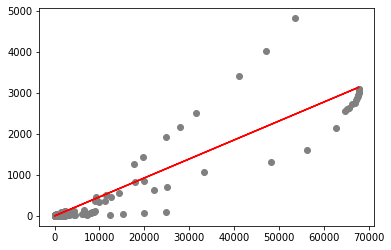

In [54]:
# Let's plot our straight line with the test data :
plt.scatter(X_test,y_test,color="gray")
plt.plot(X_test,y_prediction,color="red")
plt.show()

In [56]:
from sklearn import metrics

In [57]:
# Finding the MAE,MSE,RMSE

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_prediction))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Mean Absolute Error: 8.886653552078911
Mean Squared Error: 4152.133894237559
Root Mean Squared Error: 64.43705373647649
